In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load the data

X_train = np.loadtxt("data/seconds_1_overlap_0.5/data_Train.txt")
y_train = np.loadtxt("labels/seconds_1_overlap_0.5/labels_Train.txt")

X_val = np.loadtxt("data/seconds_1_overlap_0.5/data_Validation.txt")
y_val = np.loadtxt("labels/seconds_1_overlap_0.5/labels_Validation.txt")

X_test = np.loadtxt("data/seconds_1_overlap_0.5/data_Test.txt")
y_test = np.loadtxt("labels/seconds_1_overlap_0.5/labels_Test.txt")

In [3]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

width = X_train.shape[1]

(5680768, 44)
(1416576, 44)
(1424128, 44)


In [4]:
X_train = X_train.reshape((-1, 128, width))
X_val = X_val.reshape((-1, 128, width))
X_test = X_test.reshape((-1, 128, width))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(44381, 128, 44)
(11067, 128, 44)
(11126, 128, 44)


In [5]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(44381,)
(11067,)
(11126,)


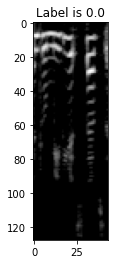

In [6]:
index = 16000

plt.imshow(X_train[index], cmap ="gray")
plt.title(f"Label is {y_train[index]}")
plt.show()

In [7]:
# resizing images

#data_padded = [data[i] for i in range(0, data.shape[0])]

#n_samples = data.shape[0]
#height = data.shape[1]
#width = data.shape[2]


#for i in range(0, n_samples):
#    for j in range(width, height):
#        data_padded[i] = np.append(data_padded[i], [[0] for k in range(0, height)], 1)
    
#data_padded = np.array(data_padded)
#data_padded.shape
#data = data_padded

In [8]:
X_train = X_train.reshape((-1, 128, width, 1))
X_val = X_val.reshape((-1, 128, width, 1))
X_test = X_test.reshape((-1, 128, width, 1))

In [9]:
# train test split
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

(array([22058.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 22323.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

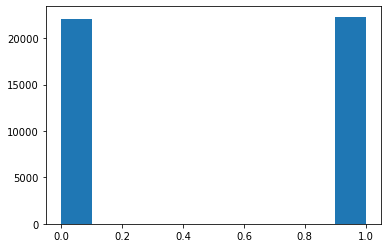

In [10]:
from matplotlib import pyplot as plt

plt.hist(y_train)

In [11]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(16, (6, 6),
                        strides=1,
                        activation="relu",
                        input_shape=(128, width, 1)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))


model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="accuracy"
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 39, 16)       592       
_________________________________________________________________
dropout (Dropout)            (None, 123, 39, 16)       0         
_________________________________________________________________
flatten (Flatten)            (None, 76752)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 76753     
Total params: 77,345
Trainable params: 77,345
Non-trainable params: 0
_________________________________________________________________


In [12]:
# normalize

X_train = X_train.astype("float32")/255.0
X_test = X_train.astype("float32")/255.0

In [13]:
#from tensorflow.keras.utils import to_categorical

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [14]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=256,
    validation_data=(X_val, y_val),
)

Epoch 1/200
174/174 [==============================] - 33s 191ms/step - loss: 0.4018 - accuracy: 0.8418 - val_loss: 20.6366 - val_accuracy: 0.8927
Epoch 2/200
174/174 [==============================] - 32s 182ms/step - loss: 0.1363 - accuracy: 0.9512 - val_loss: 38.5515 - val_accuracy: 0.8881
Epoch 3/200
174/174 [==============================] - 32s 182ms/step - loss: 0.0929 - accuracy: 0.9646 - val_loss: 13.9938 - val_accuracy: 0.9636
Epoch 4/200
174/174 [==============================] - 32s 181ms/step - loss: 0.0740 - accuracy: 0.9727 - val_loss: 8.1471 - val_accuracy: 0.9853
Epoch 5/200
174/174 [==============================] - 35s 201ms/step - loss: 0.0602 - accuracy: 0.9781 - val_loss: 8.5473 - val_accuracy: 0.9868
Epoch 6/200
174/174 [==============================] - 34s 195ms/step - loss: 0.0545 - accuracy: 0.9803 - val_loss: 19.5769 - val_accuracy: 0.9528
Epoch 7/200
174/174 [==============================] - 32s 181ms/step - loss: 0.0462 - accuracy: 0.9834 - val_loss: 48.6

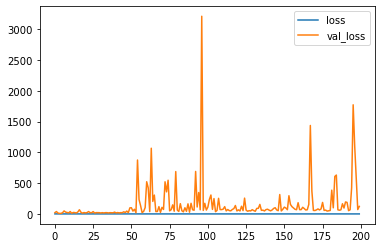

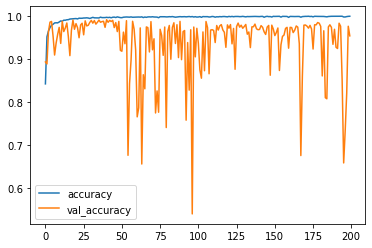

In [15]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

In [16]:
test_audio = np.loadtxt("data/seconds_1_overlap_0.5/data_Train.txt")


prediction = model.predict(
    np.array([X_test[index]])
)

#plt.plot(y_test[index])
#plt.show()

plt.plot(y_test[index], label='truth')
plt.plot(prediction[0], label='prediction')
plt.legend()
plt.show()

IndexError: index 16000 is out of bounds for axis 0 with size 11126